In [ ]:
!pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from numpy.random import seed
seed(1052023)
from random import randrange

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df = pd.read_excel("Temperature in Sao Paulo.xlsx",index_col='Date',parse_dates=True, sheet_name="S&P 500")
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

Epoch: 15 | Inputs: 126 | Kernel: 4 | Dropout: 0.2 | Loss: huber_loss


# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(15):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 126
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(len(test)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
109/109 [==============================] - 30s 24ms/step - loss: 0.3906 - accuracy: 2.8902e-04 - mean_absolute_error: 0.6477
Epoch 2/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0226 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1616
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0107 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1088
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0073 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0882
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0058 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0784
Epoch 6/10
109/109 [==============================] - 2s 15ms/step - loss: 0.0046 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0694
Epoch 7/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0034 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0605
Epoch 8/10
109/109 [==============================] - 

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 11ms/step - loss: 0.4162 - accuracy: 5.7803e-04 - mean_absolute_error: 0.6731
Epoch 2/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0228 - accuracy: 5.7803e-04 - mean_absolute_error: 0.1606
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0110 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1097
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0072 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0881
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0055 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0765
Epoch 6/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0044 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0660
Epoch 7/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0034 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0583
Epoch 8/10
109/109 [==============================] - 2

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 9s 12ms/step - loss: 0.5184 - accuracy: 0.0000e+00 - mean_absolute_error: 0.7922
Epoch 2/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0234 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1645
Epoch 3/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0119 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1137
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0072 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0867
Epoch 5/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0045 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0685
Epoch 6/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0039 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0620
Epoch 7/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0035 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0559
Epoch 8/10
109/109 [==============================] - 2

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 9s 16ms/step - loss: 0.5790 - accuracy: 2.8902e-04 - mean_absolute_error: 0.8599
Epoch 2/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0237 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1667
Epoch 3/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0116 - accuracy: 5.7803e-04 - mean_absolute_error: 0.1123
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0080 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0909
Epoch 5/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0060 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0791
Epoch 6/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0049 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0705
Epoch 7/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0039 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0649
Epoch 8/10
109/109 [==============================] - 1

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 12ms/step - loss: 0.7897 - accuracy: 5.7803e-04 - mean_absolute_error: 1.0878
Epoch 2/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0373 - accuracy: 2.8902e-04 - mean_absolute_error: 0.2092
Epoch 3/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0209 - accuracy: 5.7803e-04 - mean_absolute_error: 0.1579
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0147 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1309
Epoch 5/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0104 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1086
Epoch 6/10
109/109 [==============================] - 1s 14ms/step - loss: 0.0083 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0955
Epoch 7/10
109/109 [==============================] - 2s 14ms/step - loss: 0.0057 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0785
Epoch 8/10
109/109 [==============================] - 1

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 7s 12ms/step - loss: 0.6153 - accuracy: 2.8902e-04 - mean_absolute_error: 0.9047
Epoch 2/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0282 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1788
Epoch 3/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0141 - accuracy: 5.7803e-04 - mean_absolute_error: 0.1260
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0080 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0930
Epoch 5/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0063 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0791
Epoch 6/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0044 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0660
Epoch 7/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0039 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0616
Epoch 8/10
109/109 [==============================] - 1

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 7s 13ms/step - loss: 0.4200 - accuracy: 2.8902e-04 - mean_absolute_error: 0.7074
Epoch 2/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0282 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1808
Epoch 3/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0112 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1144
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0066 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0857
Epoch 5/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0052 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0735
Epoch 6/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0037 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0611
Epoch 7/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0031 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0567
Epoch 8/10
109/109 [==============================] - 1

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 14ms/step - loss: 0.4663 - accuracy: 2.8902e-04 - mean_absolute_error: 0.7290
Epoch 2/10
109/109 [==============================] - 2s 14ms/step - loss: 0.0211 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1494
Epoch 3/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0104 - accuracy: 5.7803e-04 - mean_absolute_error: 0.1024
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0065 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0802
Epoch 5/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0053 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0720
Epoch 6/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0052 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0669
Epoch 7/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0032 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0553
Epoch 8/10
109/109 [==============================] - 2

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 7s 16ms/step - loss: 0.4068 - accuracy: 2.8902e-04 - mean_absolute_error: 0.6673
Epoch 2/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0223 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1600
Epoch 3/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0117 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1156
Epoch 4/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0081 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0951
Epoch 5/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0059 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0799
Epoch 6/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0047 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0703
Epoch 7/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0036 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0608
Epoch 8/10
109/109 [==============================] - 2

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 17ms/step - loss: 0.5887 - accuracy: 2.8902e-04 - mean_absolute_error: 0.8534
Epoch 2/10
109/109 [==============================] - 2s 18ms/step - loss: 0.0226 - accuracy: 5.7803e-04 - mean_absolute_error: 0.1634
Epoch 3/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0118 - accuracy: 5.7803e-04 - mean_absolute_error: 0.1181
Epoch 4/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0084 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0944
Epoch 5/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0059 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0789
Epoch 6/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0046 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0694
Epoch 7/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0039 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0641
Epoch 8/10
109/109 [==============================] - 2

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 13ms/step - loss: 0.7503 - accuracy: 5.7803e-04 - mean_absolute_error: 1.0493
Epoch 2/10
109/109 [==============================] - 2s 15ms/step - loss: 0.0304 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1852
Epoch 3/10
109/109 [==============================] - 2s 18ms/step - loss: 0.0137 - accuracy: 2.8902e-04 - mean_absolute_error: 0.1233
Epoch 4/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0078 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0911
Epoch 5/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0058 - accuracy: 5.7803e-04 - mean_absolute_error: 0.0751
Epoch 6/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0049 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0659
Epoch 7/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0039 - accuracy: 2.8902e-04 - mean_absolute_error: 0.0588
Epoch 8/10
109/109 [==============================] - 2

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
RMSE

[0.0024215767926004076,
 0.002942243089899433,
 0.002730446863116638,
 0.0025390217447593434,
 0.0027838900624974545,
 0.0025298430947632957,
 0.00252857268053665,
 0.002850310460882623,
 0.0024367424119855962,
 0.0035085461092333164,
 0.0027427775910791887,
 0.002617242888891121,
 0.0026185350962638506,
 0.0026107610675041156,
 0.0026480299985705215]

In [ ]:
Accuracy

[59.6038590346023,
 37.69895721229525,
 47.21241065829418,
 60.25020891005133,
 46.38291127811096,
 57.81789588791906,
 59.03201622040051,
 40.67105638196976,
 56.8015332456584,
 46.22563291377196,
 46.004759758369815,
 54.260332411388724,
 54.06490276810941,
 63.606234593692726,
 57.74268902694484]

In [ ]:
Quasilikelihood

[0.11460148651120318,
 0.20334138960989118,
 0.1691980951450219,
 0.12366855966174738,
 0.17479967273081937,
 0.12496430626817301,
 0.12502163904081165,
 0.19315688618374852,
 0.12565250444836235,
 0.34056383956246256,
 0.1684854215519221,
 0.13831039724388633,
 0.14050326549424252,
 0.11462816639428743,
 0.13015279014817874]

Text(0, 0.5, 'S&P 500 Realized Volatility')

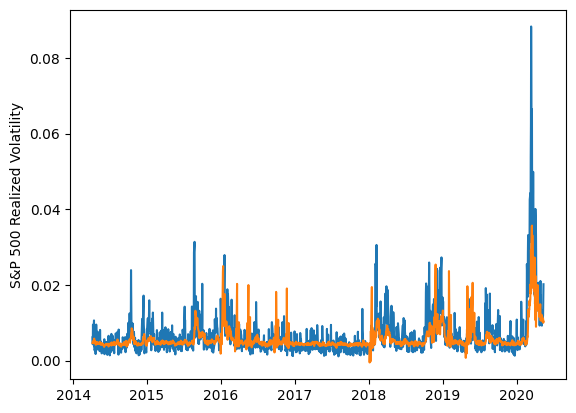

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")

# H=3 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(6):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 126
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/3)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,3:,:],[a[j*3:(j+1)*3]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  test=test[:len(test)-1]
  true_predictions=true_predictions.reshape(len(test),1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
109/109 [==============================] - 10s 11ms/step - loss: 0.3847 - accuracy: 0.3824 - mean_absolute_error: 0.6318
Epoch 2/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0191 - accuracy: 0.3806 - mean_absolute_error: 0.1496
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0082 - accuracy: 0.3627 - mean_absolute_error: 0.0945
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0044 - accuracy: 0.3379 - mean_absolute_error: 0.0660
Epoch 5/10
109/109 [==============================] - 2s 14ms/step - loss: 0.0032 - accuracy: 0.3329 - mean_absolute_error: 0.0537
Epoch 6/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0026 - accuracy: 0.3171 - mean_absolute_error: 0.0474
Epoch 7/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0023 - accuracy: 0.3029 - mean_absolute_error: 0.0442
Epoch 8/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0021 

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 9s 11ms/step - loss: 0.7084 - accuracy: 0.3277 - mean_absolute_error: 0.9715
Epoch 2/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0231 - accuracy: 0.3214 - mean_absolute_error: 0.1611
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0111 - accuracy: 0.3329 - mean_absolute_error: 0.1077
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0070 - accuracy: 0.3462 - mean_absolute_error: 0.0832
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0050 - accuracy: 0.3425 - mean_absolute_error: 0.0696
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0039 - accuracy: 0.3529 - mean_absolute_error: 0.0611
Epoch 7/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0033 - accuracy: 0.3809 - mean_absolute_error: 0.0551
Epoch 8/10
109/109 [==============================] - 2s 14ms/step - loss: 0.0029 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 7s 15ms/step - loss: 0.3155 - accuracy: 0.3353 - mean_absolute_error: 0.5384
Epoch 2/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0114 - accuracy: 0.3101 - mean_absolute_error: 0.1140
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0060 - accuracy: 0.3367 - mean_absolute_error: 0.0794
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0039 - accuracy: 0.3803 - mean_absolute_error: 0.0613
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0031 - accuracy: 0.3801 - mean_absolute_error: 0.0529
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0028 - accuracy: 0.3882 - mean_absolute_error: 0.0499
Epoch 7/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0023 - accuracy: 0.3893 - mean_absolute_error: 0.0448
Epoch 8/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0021 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 11ms/step - loss: 0.3759 - accuracy: 0.3228 - mean_absolute_error: 0.5881
Epoch 2/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0099 - accuracy: 0.3199 - mean_absolute_error: 0.1018
Epoch 3/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0054 - accuracy: 0.3217 - mean_absolute_error: 0.0718
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0036 - accuracy: 0.3000 - mean_absolute_error: 0.0569
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0030 - accuracy: 0.3301 - mean_absolute_error: 0.0508
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0026 - accuracy: 0.3035 - mean_absolute_error: 0.0469
Epoch 7/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0024 - accuracy: 0.3315 - mean_absolute_error: 0.0445
Epoch 8/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0022 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 12ms/step - loss: 0.4052 - accuracy: 0.3384 - mean_absolute_error: 0.6598
Epoch 2/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0197 - accuracy: 0.3616 - mean_absolute_error: 0.1484
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0095 - accuracy: 0.3685 - mean_absolute_error: 0.1018
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0059 - accuracy: 0.3645 - mean_absolute_error: 0.0787
Epoch 5/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0044 - accuracy: 0.3705 - mean_absolute_error: 0.0661
Epoch 6/10
109/109 [==============================] - 2s 15ms/step - loss: 0.0036 - accuracy: 0.3396 - mean_absolute_error: 0.0589
Epoch 7/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0030 - accuracy: 0.3434 - mean_absolute_error: 0.0524
Epoch 8/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0028 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
RMSE

[0.00264666527391459,
 0.0027243017810933633,
 0.0026822752376330166,
 0.003523523703484715,
 0.002782834216751077,
 0.002763327319491575,
 0.002753222988542804,
 0.0026685290263776316,
 0.0025496242024376204,
 0.0025031337826064352,
 0.002736023140400622,
 0.0026261608233232613,
 0.0026555108503841843,
 0.002608143794619411,
 0.0029999136331013182]

In [ ]:
Accuracy

[53.84411057332701,
 48.78510993439251,
 57.112691542424734,
 30.876406461058238,
 47.832453458165055,
 49.848625928178215,
 46.985609235106075,
 53.475437311933824,
 54.121391433150045,
 56.925125848313776,
 51.17400125876392,
 56.90829347802988,
 51.068840642284876,
 54.01480592932133,
 41.93024313115754]

In [ ]:
Quasilikelihood

[0.1417515222253273,
 0.16280269688986945,
 0.13610045761892975,
 0.2583073373180671,
 0.17098728390774043,
 0.15953410898337406,
 0.17026406754790355,
 0.14486222475630198,
 0.1405378301568001,
 0.1273354454168082,
 0.15126101266025305,
 0.13288158972703107,
 0.15131614012853603,
 0.14996641225048699,
 0.1945270619660043]

Text(0, 0.5, 'S&P 500 Realized Volatility')

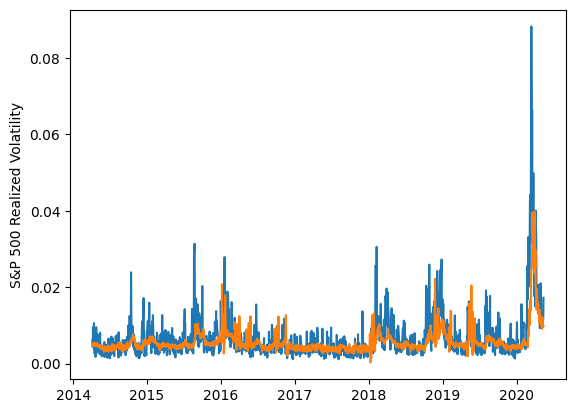

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(df_for_date["Date"])-1], test)
plt.plot(df_for_date["Date"][:len(df_for_date["Date"])-1], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")

# H=5 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(15):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 126
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/5)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,5:,:],[a[j*5:(j+1)*5]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  test=test[:len(test)-2]
  true_predictions=true_predictions.reshape(len(test),1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
109/109 [==============================] - 14s 18ms/step - loss: 0.2275 - accuracy: 0.1847 - mean_absolute_error: 0.4296
Epoch 2/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0086 - accuracy: 0.2182 - mean_absolute_error: 0.0946
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0045 - accuracy: 0.1884 - mean_absolute_error: 0.0658
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0033 - accuracy: 0.1665 - mean_absolute_error: 0.0551
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0027 - accuracy: 0.1844 - mean_absolute_error: 0.0478
Epoch 6/10
109/109 [==============================] - 1s 10ms/step - loss: 0.0024 - accuracy: 0.1202 - mean_absolute_error: 0.0451
Epoch 7/10
109/109 [==============================] - 1s 10ms/step - loss: 0.0022 - accuracy: 0.1601 - mean_absolute_error: 0.0422
Epoch 8/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0021 

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 7s 11ms/step - loss: 0.2875 - accuracy: 0.1298 - mean_absolute_error: 0.4941
Epoch 2/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0107 - accuracy: 0.1434 - mean_absolute_error: 0.1079
Epoch 3/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0056 - accuracy: 0.1618 - mean_absolute_error: 0.0753
Epoch 4/10
109/109 [==============================] - 3s 23ms/step - loss: 0.0038 - accuracy: 0.1662 - mean_absolute_error: 0.0608
Epoch 5/10
109/109 [==============================] - 2s 14ms/step - loss: 0.0033 - accuracy: 0.1934 - mean_absolute_error: 0.0540
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0028 - accuracy: 0.2491 - mean_absolute_error: 0.0493
Epoch 7/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0025 - accuracy: 0.2298 - mean_absolute_error: 0.0465
Epoch 8/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0024 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 17ms/step - loss: 0.3440 - accuracy: 0.2084 - mean_absolute_error: 0.5635
Epoch 2/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0119 - accuracy: 0.2335 - mean_absolute_error: 0.1154
Epoch 3/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0064 - accuracy: 0.2078 - mean_absolute_error: 0.0820
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0042 - accuracy: 0.1873 - mean_absolute_error: 0.0636
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0033 - accuracy: 0.1971 - mean_absolute_error: 0.0542
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0027 - accuracy: 0.2292 - mean_absolute_error: 0.0484
Epoch 7/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0024 - accuracy: 0.2090 - mean_absolute_error: 0.0455
Epoch 8/10
109/109 [==============================] - 2s 15ms/step - loss: 0.0022 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 7s 11ms/step - loss: 0.2459 - accuracy: 0.2379 - mean_absolute_error: 0.4514
Epoch 2/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0079 - accuracy: 0.2318 - mean_absolute_error: 0.0891
Epoch 3/10
109/109 [==============================] - 2s 15ms/step - loss: 0.0044 - accuracy: 0.2240 - mean_absolute_error: 0.0625
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0031 - accuracy: 0.2052 - mean_absolute_error: 0.0516
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0027 - accuracy: 0.1829 - mean_absolute_error: 0.0476
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0024 - accuracy: 0.1789 - mean_absolute_error: 0.0437
Epoch 7/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0022 - accuracy: 0.1714 - mean_absolute_error: 0.0416
Epoch 8/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0020 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 11ms/step - loss: 0.4372 - accuracy: 0.1905 - mean_absolute_error: 0.6653
Epoch 2/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0113 - accuracy: 0.1841 - mean_absolute_error: 0.1102
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0057 - accuracy: 0.1809 - mean_absolute_error: 0.0736
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0039 - accuracy: 0.1699 - mean_absolute_error: 0.0587
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0032 - accuracy: 0.1751 - mean_absolute_error: 0.0520
Epoch 6/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0027 - accuracy: 0.1789 - mean_absolute_error: 0.0479
Epoch 7/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0024 - accuracy: 0.1957 - mean_absolute_error: 0.0445
Epoch 8/10
109/109 [==============================] - 2s 15ms/step - loss: 0.0023 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 7s 12ms/step - loss: 0.3269 - accuracy: 0.2220 - mean_absolute_error: 0.5427
Epoch 2/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0100 - accuracy: 0.2364 - mean_absolute_error: 0.1033
Epoch 3/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0055 - accuracy: 0.2592 - mean_absolute_error: 0.0730
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0039 - accuracy: 0.2486 - mean_absolute_error: 0.0603
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0031 - accuracy: 0.2370 - mean_absolute_error: 0.0527
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0027 - accuracy: 0.2075 - mean_absolute_error: 0.0485
Epoch 7/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0025 - accuracy: 0.2055 - mean_absolute_error: 0.0470
Epoch 8/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0025 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 12ms/step - loss: 0.3186 - accuracy: 0.2121 - mean_absolute_error: 0.5420
Epoch 2/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0116 - accuracy: 0.1960 - mean_absolute_error: 0.1107
Epoch 3/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0057 - accuracy: 0.1798 - mean_absolute_error: 0.0726
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0038 - accuracy: 0.1786 - mean_absolute_error: 0.0574
Epoch 5/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0029 - accuracy: 0.1662 - mean_absolute_error: 0.0498
Epoch 6/10
109/109 [==============================] - 2s 14ms/step - loss: 0.0026 - accuracy: 0.1679 - mean_absolute_error: 0.0463
Epoch 7/10
109/109 [==============================] - 2s 14ms/step - loss: 0.0023 - accuracy: 0.1688 - mean_absolute_error: 0.0438
Epoch 8/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0022 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 16ms/step - loss: 0.3465 - accuracy: 0.1630 - mean_absolute_error: 0.5782
Epoch 2/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0137 - accuracy: 0.1708 - mean_absolute_error: 0.1214
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0068 - accuracy: 0.1838 - mean_absolute_error: 0.0818
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0044 - accuracy: 0.1896 - mean_absolute_error: 0.0639
Epoch 5/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0032 - accuracy: 0.2529 - mean_absolute_error: 0.0532
Epoch 6/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0029 - accuracy: 0.2905 - mean_absolute_error: 0.0496
Epoch 7/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0026 - accuracy: 0.2633 - mean_absolute_error: 0.0453
Epoch 8/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0023 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 7s 12ms/step - loss: 0.3592 - accuracy: 0.2202 - mean_absolute_error: 0.5834
Epoch 2/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0104 - accuracy: 0.1925 - mean_absolute_error: 0.1055
Epoch 3/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0050 - accuracy: 0.1584 - mean_absolute_error: 0.0688
Epoch 4/10
109/109 [==============================] - 2s 15ms/step - loss: 0.0035 - accuracy: 0.1234 - mean_absolute_error: 0.0560
Epoch 5/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0031 - accuracy: 0.1121 - mean_absolute_error: 0.0509
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0026 - accuracy: 0.1046 - mean_absolute_error: 0.0468
Epoch 7/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0024 - accuracy: 0.1223 - mean_absolute_error: 0.0448
Epoch 8/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0022 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 7s 12ms/step - loss: 0.3010 - accuracy: 0.1962 - mean_absolute_error: 0.4980
Epoch 2/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0082 - accuracy: 0.2049 - mean_absolute_error: 0.0939
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0044 - accuracy: 0.2078 - mean_absolute_error: 0.0653
Epoch 4/10
109/109 [==============================] - 1s 14ms/step - loss: 0.0032 - accuracy: 0.1873 - mean_absolute_error: 0.0551
Epoch 5/10
109/109 [==============================] - 2s 17ms/step - loss: 0.0026 - accuracy: 0.1939 - mean_absolute_error: 0.0492
Epoch 6/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0024 - accuracy: 0.1679 - mean_absolute_error: 0.0459
Epoch 7/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0022 - accuracy: 0.1494 - mean_absolute_error: 0.0443
Epoch 8/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0021 -

In [ ]:
RMSE

[0.002769100940635931,
 0.0027025644422655204,
 0.0026002202384926587,
 0.002869142259219014,
 0.0026279679574720423,
 0.002719394209377201,
 0.0028415593529924287,
 0.0028127637065806393,
 0.002977223149969854,
 0.002690356082631455,
 0.0027993820499191964,
 0.002832944527255134,
 0.0026873333031878707,
 0.002829332810899486,
 0.0027178278352240725]

In [ ]:
Accuracy

[46.126361794496994,
 48.15695271382543,
 53.100356835700715,
 45.84760578935476,
 53.441591610773806,
 52.012659888179954,
 43.76577973660055,
 47.66772470869132,
 38.47375991491331,
 52.45485409318273,
 45.26684749727272,
 45.96622112648331,
 51.28992794552079,
 46.723826503156964,
 54.957178033578735]

In [ ]:
Quasilikelihood

[0.17353464352557754,
 0.16284466019759206,
 0.14371371285209544,
 0.17961431044180826,
 0.14626075816065637,
 0.1532344604248323,
 0.17993090603999487,
 0.16916838304094367,
 0.20347827774558086,
 0.14956395899372898,
 0.17678305468492259,
 0.17910210298306145,
 0.15228530116911465,
 0.1721489164315861,
 0.1443096639467809]

Text(0, 0.5, 'S&P 500 Realized Volatility')

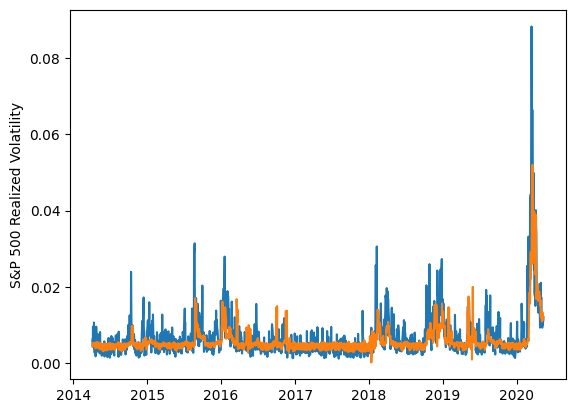

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")

# H=10 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(15):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 126
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/10)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,10:,:],[a[j*10:(j+1)*10]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  test=test[:len(test)-7]
  true_predictions=true_predictions.reshape(len(test),1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
109/109 [==============================] - 8s 12ms/step - loss: 0.4707 - accuracy: 0.0913 - mean_absolute_error: 0.6877
Epoch 2/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0107 - accuracy: 0.0864 - mean_absolute_error: 0.1049
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0060 - accuracy: 0.0879 - mean_absolute_error: 0.0752
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0042 - accuracy: 0.0997 - mean_absolute_error: 0.0614
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0034 - accuracy: 0.1142 - mean_absolute_error: 0.0537
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0030 - accuracy: 0.0867 - mean_absolute_error: 0.0503
Epoch 7/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0027 - accuracy: 0.0769 - mean_absolute_error: 0.0482
Epoch 8/10
109/109 [==============================] - 2s 15ms/step - loss: 0.0024 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 7s 11ms/step - loss: 0.4177 - accuracy: 0.0936 - mean_absolute_error: 0.6511
Epoch 2/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0124 - accuracy: 0.1145 - mean_absolute_error: 0.1166
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0063 - accuracy: 0.1367 - mean_absolute_error: 0.0796
Epoch 4/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0044 - accuracy: 0.1185 - mean_absolute_error: 0.0649
Epoch 5/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0036 - accuracy: 0.0928 - mean_absolute_error: 0.0562
Epoch 6/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0030 - accuracy: 0.0847 - mean_absolute_error: 0.0509
Epoch 7/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0028 - accuracy: 0.0812 - mean_absolute_error: 0.0488
Epoch 8/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0025 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 11ms/step - loss: 0.3722 - accuracy: 0.0864 - mean_absolute_error: 0.5812
Epoch 2/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0085 - accuracy: 0.1121 - mean_absolute_error: 0.0943
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0048 - accuracy: 0.1162 - mean_absolute_error: 0.0679
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0037 - accuracy: 0.1214 - mean_absolute_error: 0.0565
Epoch 5/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0029 - accuracy: 0.0988 - mean_absolute_error: 0.0504
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0027 - accuracy: 0.0925 - mean_absolute_error: 0.0467
Epoch 7/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0025 - accuracy: 0.0795 - mean_absolute_error: 0.0451
Epoch 8/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0023 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 12ms/step - loss: 0.2011 - accuracy: 0.0835 - mean_absolute_error: 0.3862
Epoch 2/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0076 - accuracy: 0.0887 - mean_absolute_error: 0.0891
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0042 - accuracy: 0.0861 - mean_absolute_error: 0.0618
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0032 - accuracy: 0.1035 - mean_absolute_error: 0.0518
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0026 - accuracy: 0.0896 - mean_absolute_error: 0.0472
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0024 - accuracy: 0.0803 - mean_absolute_error: 0.0440
Epoch 7/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0022 - accuracy: 0.0662 - mean_absolute_error: 0.0432
Epoch 8/10
109/109 [==============================] - 2s 14ms/step - loss: 0.0022 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 12ms/step - loss: 0.2713 - accuracy: 0.0988 - mean_absolute_error: 0.4746
Epoch 2/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0080 - accuracy: 0.0682 - mean_absolute_error: 0.0916
Epoch 3/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0044 - accuracy: 0.0676 - mean_absolute_error: 0.0637
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0033 - accuracy: 0.0821 - mean_absolute_error: 0.0527
Epoch 5/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0027 - accuracy: 0.0645 - mean_absolute_error: 0.0481
Epoch 6/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0025 - accuracy: 0.0841 - mean_absolute_error: 0.0447
Epoch 7/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0022 - accuracy: 0.0786 - mean_absolute_error: 0.0429
Epoch 8/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0021 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 7s 11ms/step - loss: 0.3381 - accuracy: 0.0841 - mean_absolute_error: 0.5453
Epoch 2/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0084 - accuracy: 0.1191 - mean_absolute_error: 0.0935
Epoch 3/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0049 - accuracy: 0.1231 - mean_absolute_error: 0.0680
Epoch 4/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0035 - accuracy: 0.1202 - mean_absolute_error: 0.0558
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0029 - accuracy: 0.1691 - mean_absolute_error: 0.0504
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0026 - accuracy: 0.1408 - mean_absolute_error: 0.0466
Epoch 7/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0024 - accuracy: 0.1428 - mean_absolute_error: 0.0449
Epoch 8/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0024 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 12ms/step - loss: 0.2166 - accuracy: 0.0968 - mean_absolute_error: 0.4025
Epoch 2/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0070 - accuracy: 0.0783 - mean_absolute_error: 0.0836
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0037 - accuracy: 0.0754 - mean_absolute_error: 0.0575
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0028 - accuracy: 0.0746 - mean_absolute_error: 0.0486
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0026 - accuracy: 0.0786 - mean_absolute_error: 0.0460
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0023 - accuracy: 0.0679 - mean_absolute_error: 0.0433
Epoch 7/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0024 - accuracy: 0.0538 - mean_absolute_error: 0.0436
Epoch 8/10
109/109 [==============================] - 2s 15ms/step - loss: 0.0020 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
RMSE

[0.0030948608456791127,
 0.003061926889847893,
 0.003188936619303667,
 0.0030573847429370355,
 0.003018401314296205,
 0.0029554107888300246,
 0.0030510405583387416,
 0.0030586310934102167,
 0.0028867153912000383,
 0.003112242108410584,
 0.003017197633864536,
 0.003078358356301898,
 0.0028068034342926145,
 0.002894875165455896,
 0.0028954933764436495]

In [ ]:
Accuracy

[39.31383406271629,
 39.66058691674108,
 35.279004136675006,
 40.505430607934954,
 43.446759961612734,
 44.03780284290689,
 40.315713664319354,
 41.925654469690755,
 45.41911280921859,
 37.76129389592321,
 41.34452940119008,
 38.55381158149244,
 50.12794725501539,
 46.647583953143524,
 47.821635254486715]

In [ ]:
Quasilikelihood

[0.2107665688407905,
 0.20979885941303397,
 0.22900173009675656,
 0.2050523658341178,
 0.1872544631485822,
 0.18668565796162157,
 0.20498914289027373,
 0.19972926644933175,
 0.18208730163374023,
 0.2171148279157428,
 0.1974060498194021,
 0.20988635821249282,
 0.1609679477393053,
 0.17432148813540033,
 0.17132686708734965]

Text(0, 0.5, 'S&P 500 Realized Volatility')

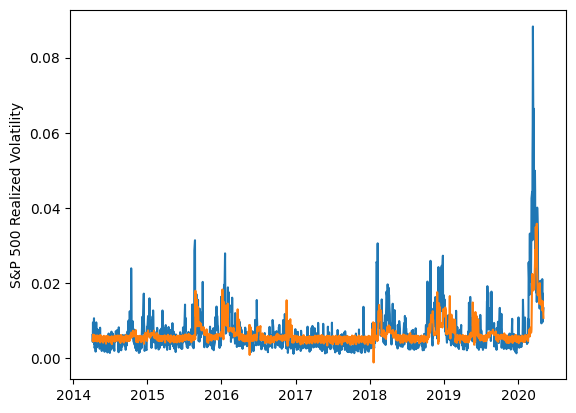

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")

# H=22 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(15):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 3
  n_input = 126
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
              dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/22)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,22:,:],[a[j*22:(j+1)*22]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  test=test[:len(test)-19]
  true_predictions=true_predictions.reshape(len(test),1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
109/109 [==============================] - 15s 11ms/step - loss: 0.2235 - accuracy: 0.0436 - mean_absolute_error: 0.3936
Epoch 2/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0069 - accuracy: 0.0277 - mean_absolute_error: 0.0819
Epoch 3/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0043 - accuracy: 0.0217 - mean_absolute_error: 0.0612
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0034 - accuracy: 0.0139 - mean_absolute_error: 0.0532
Epoch 5/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0029 - accuracy: 0.0118 - mean_absolute_error: 0.0478
Epoch 6/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0025 - accuracy: 0.0121 - mean_absolute_error: 0.0459
Epoch 7/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0024 - accuracy: 0.0101 - mean_absolute_error: 0.0443
Epoch 8/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0023 

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 14ms/step - loss: 0.1813 - accuracy: 0.0266 - mean_absolute_error: 0.3681
Epoch 2/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0068 - accuracy: 0.0231 - mean_absolute_error: 0.0807
Epoch 3/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0038 - accuracy: 0.0387 - mean_absolute_error: 0.0560
Epoch 4/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0031 - accuracy: 0.0257 - mean_absolute_error: 0.0502
Epoch 5/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0029 - accuracy: 0.0211 - mean_absolute_error: 0.0480
Epoch 6/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0026 - accuracy: 0.0194 - mean_absolute_error: 0.0456
Epoch 7/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0025 - accuracy: 0.0133 - mean_absolute_error: 0.0458
Epoch 8/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0023 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 9s 11ms/step - loss: 0.3057 - accuracy: 0.1064 - mean_absolute_error: 0.4926
Epoch 2/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0078 - accuracy: 0.0740 - mean_absolute_error: 0.0911
Epoch 3/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0044 - accuracy: 0.0321 - mean_absolute_error: 0.0646
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0034 - accuracy: 0.0171 - mean_absolute_error: 0.0538
Epoch 5/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0029 - accuracy: 0.0130 - mean_absolute_error: 0.0488
Epoch 6/10
109/109 [==============================] - 2s 16ms/step - loss: 0.0027 - accuracy: 0.0147 - mean_absolute_error: 0.0473
Epoch 7/10
109/109 [==============================] - 2s 14ms/step - loss: 0.0026 - accuracy: 0.0118 - mean_absolute_error: 0.0461
Epoch 8/10
109/109 [==============================] - 1s 11ms/step - loss: 0.0025 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
109/109 [==============================] - 8s 12ms/step - loss: 0.3801 - accuracy: 0.0465 - mean_absolute_error: 0.5878
Epoch 2/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0088 - accuracy: 0.0509 - mean_absolute_error: 0.0939
Epoch 3/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0050 - accuracy: 0.0714 - mean_absolute_error: 0.0650
Epoch 4/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0036 - accuracy: 0.0855 - mean_absolute_error: 0.0537
Epoch 5/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0032 - accuracy: 0.0789 - mean_absolute_error: 0.0508
Epoch 6/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0029 - accuracy: 0.0855 - mean_absolute_error: 0.0492
Epoch 7/10
109/109 [==============================] - 1s 13ms/step - loss: 0.0028 - accuracy: 0.0639 - mean_absolute_error: 0.0478
Epoch 8/10
109/109 [==============================] - 1s 12ms/step - loss: 0.0027 -

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
RMSE

[0.0032568256149792607,
 0.0032369502812422163,
 0.003552927090371744,
 0.003365566080279145,
 0.003141188606414124,
 0.0032962724223605157,
 0.003554527602881712,
 0.0034542174099938382,
 0.0032260701590531753,
 0.0035300390184882,
 0.0032745000737455093,
 0.003412971640312022,
 0.0032366991634993447,
 0.0033697664310885092,
 0.003373675212794151]

In [ ]:
Accuracy

[37.699618478571196,
 36.0084653136068,
 26.97002489132575,
 29.91969793628457,
 39.20275702568296,
 33.879340374414554,
 26.08788300526261,
 26.37986381050229,
 37.793324409202235,
 24.628797315207997,
 33.21732880077043,
 27.013557810424725,
 33.99430320640984,
 30.5250885792006,
 33.770648230585685]

In [ ]:
Quasilikelihood

[0.22808111441000378,
 0.22912856921874536,
 0.27323623018068677,
 0.25699457470318754,
 0.2144923314844868,
 0.23683676924991742,
 0.2787403381452294,
 0.2739163454480231,
 0.2181592423435646,
 0.2798415876070875,
 0.2463416186700569,
 0.2681855272197273,
 0.23742624137236906,
 0.2547647809766929,
 0.2393428343791866]

Text(0, 0.5, 'S&P 500 Realized Volatility')

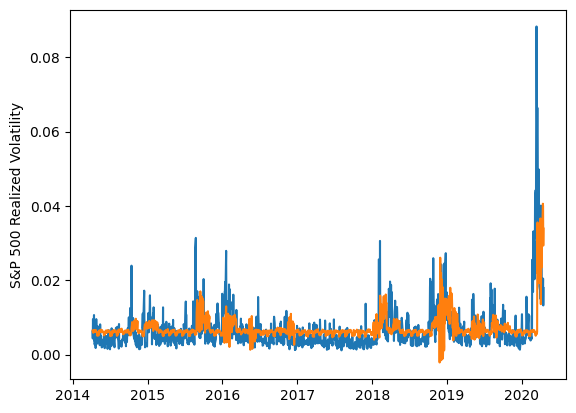

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")